In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
datafile = pd.read_csv('/kaggle/input/test-file/test.csv', delimiter=',')
nRow, nCol = datafile.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 300 rows and 2 columns


In [4]:
datafile.head()


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


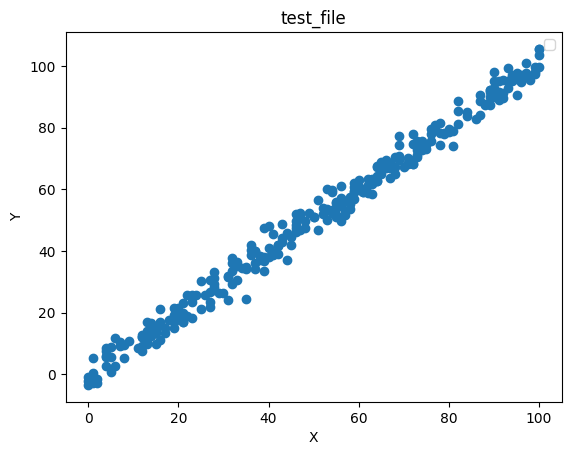

In [5]:
plt.scatter(datafile['x'],datafile['y'])
plt.title("test_file")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<Axes: >

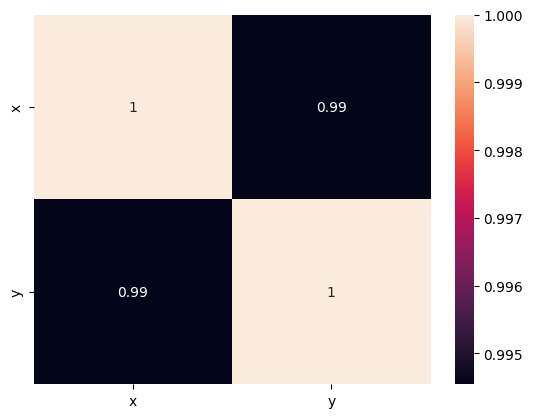

In [6]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

In [7]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['x']])
train_y = np.asanyarray(datafile[['y']])


regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)


Coefficients:  [[1.01433536]]
Intercept:  [-0.46181077]


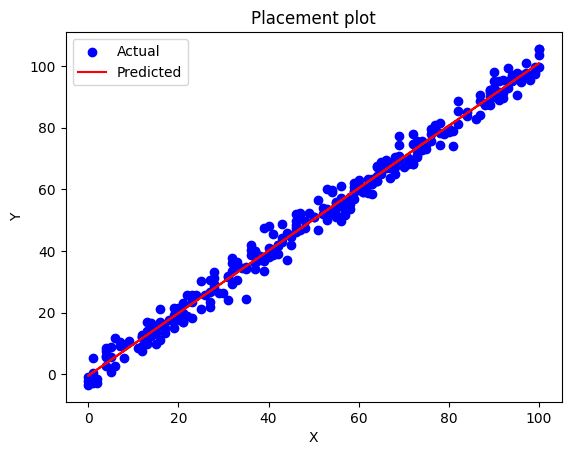

In [8]:
plt.scatter(datafile.x, datafile.y,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
y_predicted = regress.predict(train_x)

datafile['Predicted'] = y_predicted

print(datafile)

      x          y  Predicted
0    77  79.775152  77.642012
1    21  23.177279  20.839232
2    22  25.609262  21.853567
3    20  17.857388  19.824896
4    36  41.849864  36.054262
..   ..        ...        ...
295  71  68.545888  71.555999
296  46  47.334876  46.197616
297  55  54.090637  55.326634
298  62  63.297171  62.426981
299  47  52.459467  47.211951

[300 rows x 3 columns]


In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))


Mean Absolute Error: 2.4105243526891287
Mean Squared Error: 9.164287860614264
Root Mean Squared Error: 3.027257481717448


In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['x']])
test_y = np.asanyarray(datafile[['y']])
test_y_predicted = regress.predict(test_x)
print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 2.4105243526891287
Mean square error (MSE):  9.164287860614264
R2-score: %.2f (RMSE): 0.9891203611402716


In [15]:
print(y_predicted)

[[ 77.64201157]
 [ 20.83923168]
 [ 21.85356704]
 [ 19.82489633]
 [ 36.05426201]
 [ 14.75321955]
 [ 62.42698124]
 [ 95.90004796]
 [ 19.82489633]
 [  4.609866  ]
 [  3.59553065]
 [ 18.81056097]
 [ 96.91438332]
 [ 62.42698124]
 [ 36.05426201]
 [ 14.75321955]
 [ 65.46998731]
 [ 13.7388842 ]
 [ 87.78536512]
 [ 69.52732873]
 [ 89.81403583]
 [ 51.26929234]
 [ 89.81403583]
 [ 26.92524381]
 [ 97.92871867]
 [ 58.36963982]
 [ 79.67068228]
 [ 20.83923168]
 [ 93.87137725]
 [ 26.92524381]
 [ 99.95738938]
 [ 30.98258524]
 [ 33.01125595]
 [ 80.68501764]
 [ 27.93957917]
 [ 47.21195092]
 [ 53.29796305]
 [ 69.52732873]
 [ 27.93957917]
 [ 33.01125595]
 [ 91.84270654]
 [ 71.55599944]
 [ 50.25495698]
 [ 76.62767622]
 [  3.59553065]
 [ 37.06859737]
 [ 70.54166408]
 [ 68.51299337]
 [ 40.11160343]
 [ 35.03992666]
 [ 94.88571261]
 [ 88.79970048]
 [ 52.28362769]
 [ 30.98258524]
 [ 59.38397518]
 [ -0.46181077]
 [ 39.09726808]
 [ 64.45565195]
 [ 69.52732873]
 [ 57.35530447]
 [ 12.72454884]
 [ 72.57033479]
 [ 76.62

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


squared_error = mean_squared_error(test_y, y_predicted)
absolute_error = mean_absolute_error(test_y,y_predicted)

print('Squared Error:', squared_error)
print('Absolute Error:', absolute_error)

Squared Error: 9.164287860614264
Absolute Error: 2.4105243526891287


In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(test_y, test_y_predicted)
adjusted_r2 = 1 - ((1 - r2) * (len(test_y) - 1) / (len(test_y) - 1 - 1))

print("R2-score:", r2)
print("Adjusted R2-score:", adjusted_r2)

R2-score: 0.9891203611402716
Adjusted R2-score: 0.9890838522850376
